In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
import json

# Abre el archivo JSON y carga los datos
with open('dolar.json', 'r') as json_file:
    dolars = json.load(json_file)

In [211]:

filtered_data = [item for item in dolars if item["source"] == "Blue" and item["date"] < "2023-10-17" and item["date"] > "2023-09-17" ]
filtered_data = sorted(filtered_data, key=lambda x: x["date"])

def filtrar_x(data): 
    fecha_str = data["date"]
    # Elimina los guiones de la cadena de fecha
    fecha_sin_guiones = fecha_str.replace("-", "")
    
    # Convierte la cadena en un número entero
    numero = int(fecha_sin_guiones)

    return numero
    
def filtrar_y(data): 
    return data["value_sell"]
        

arrayX = map(filtrar_x, filtered_data) 
arrayY = map(filtrar_y, filtered_data) 
#print(filtered_data)
#print(list(arrayX))
#print(list(arrayY))

In [212]:
#x=np.array([1920,1930,1940,1950,1960,1970,1980,1990])
#y=np.array([106.46,123.08,132.12,152.27,180.67,205.05,227.23,249.46])
#nuevo = list(arrayX)
#for index, item in enumerate(nuevo):
#    nuevo[index] = index

x=np.array(list(arrayX))
y=np.array(list(arrayY))
print(x)
print(y)

[20230918 20230919 20230920 20230921 20230922 20230925 20230926 20230927
 20230928 20230929 20231002 20231003 20231004 20231005 20231006 20231009
 20231010 20231011 20231012 20231013 20231016]
[ 738.  740.  735.  745.  745.  745.  758.  773.  790.  800.  800.  810.
  843.  843.  880.  945. 1010. 1010.  980.  980.  980.]


In [213]:
def fx (x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

para grado 0 la predicción es 840.4761904761903


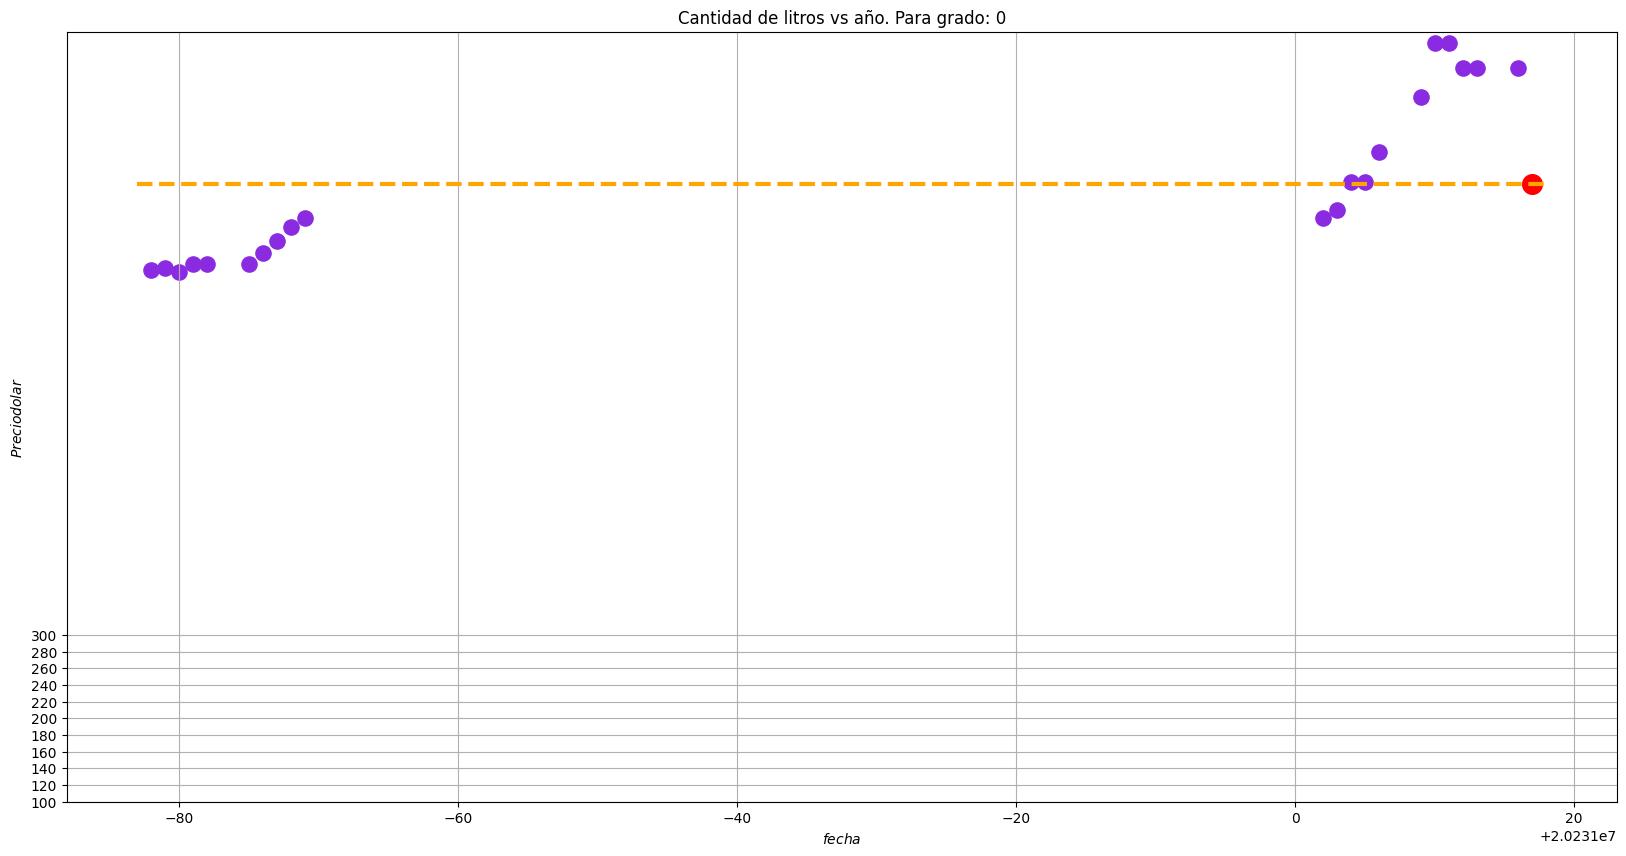

para grado 1 la predicción es 937.3594006374478


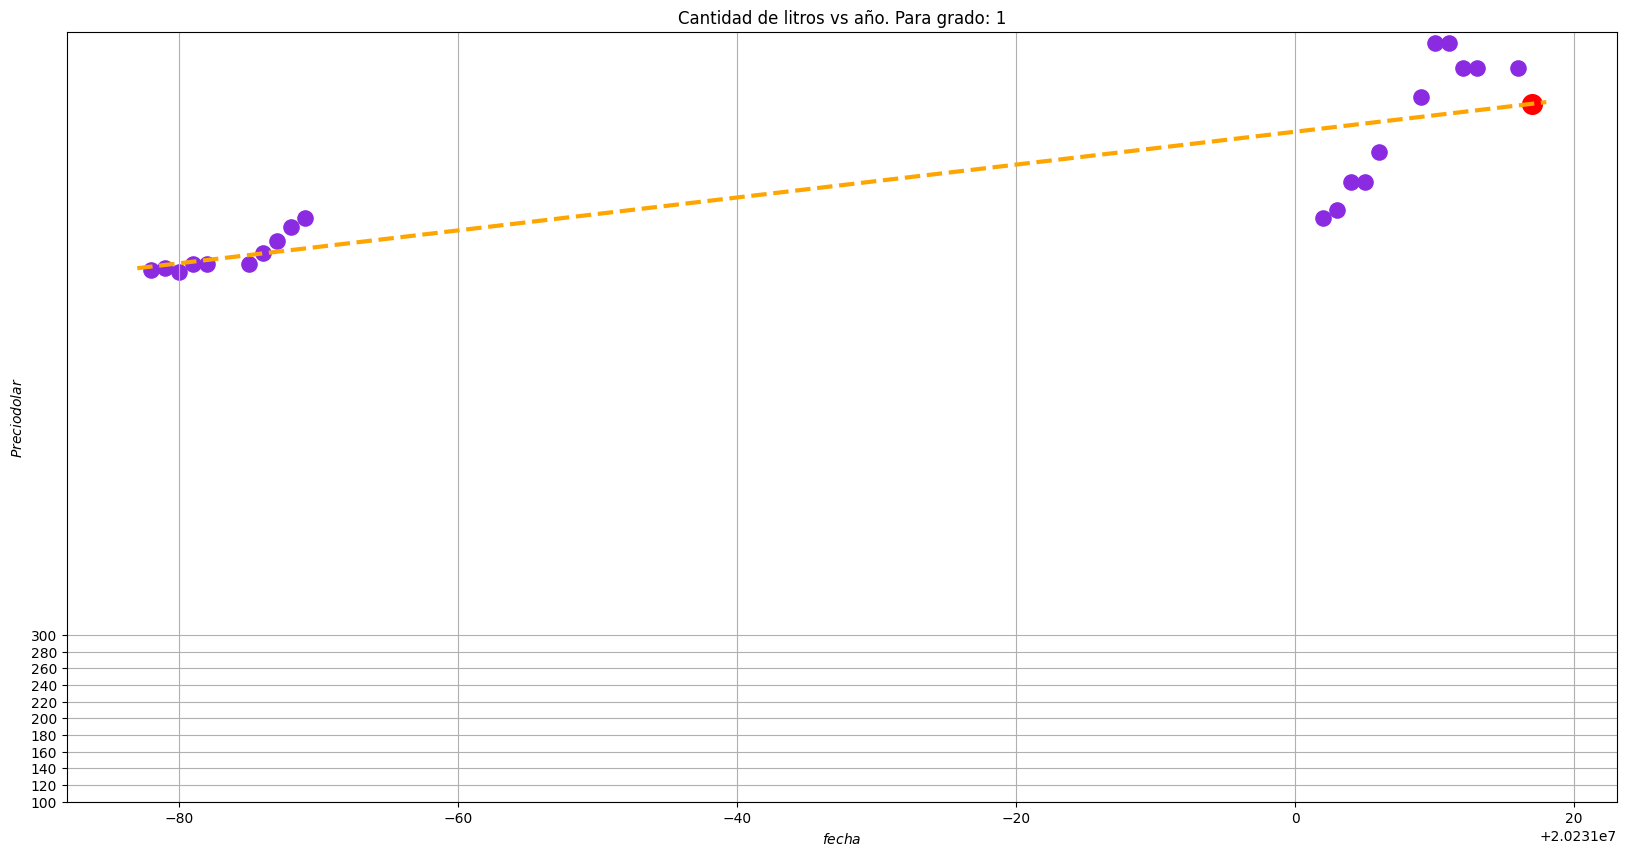

para grado 2 la predicción es 1003.27734375


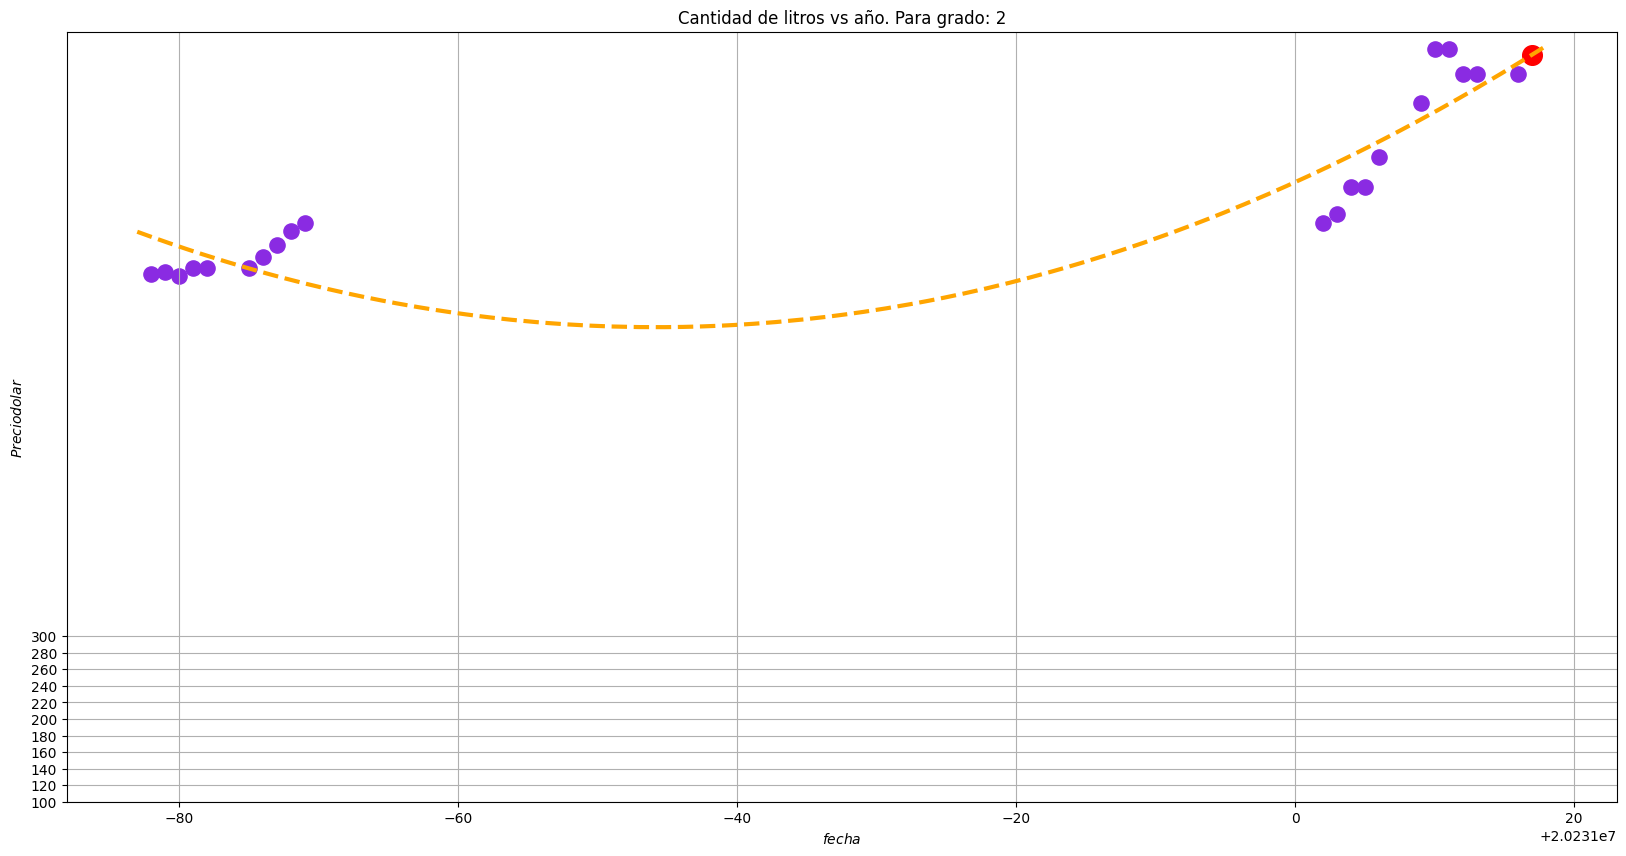

para grado 3 la predicción es 1003.265625


C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


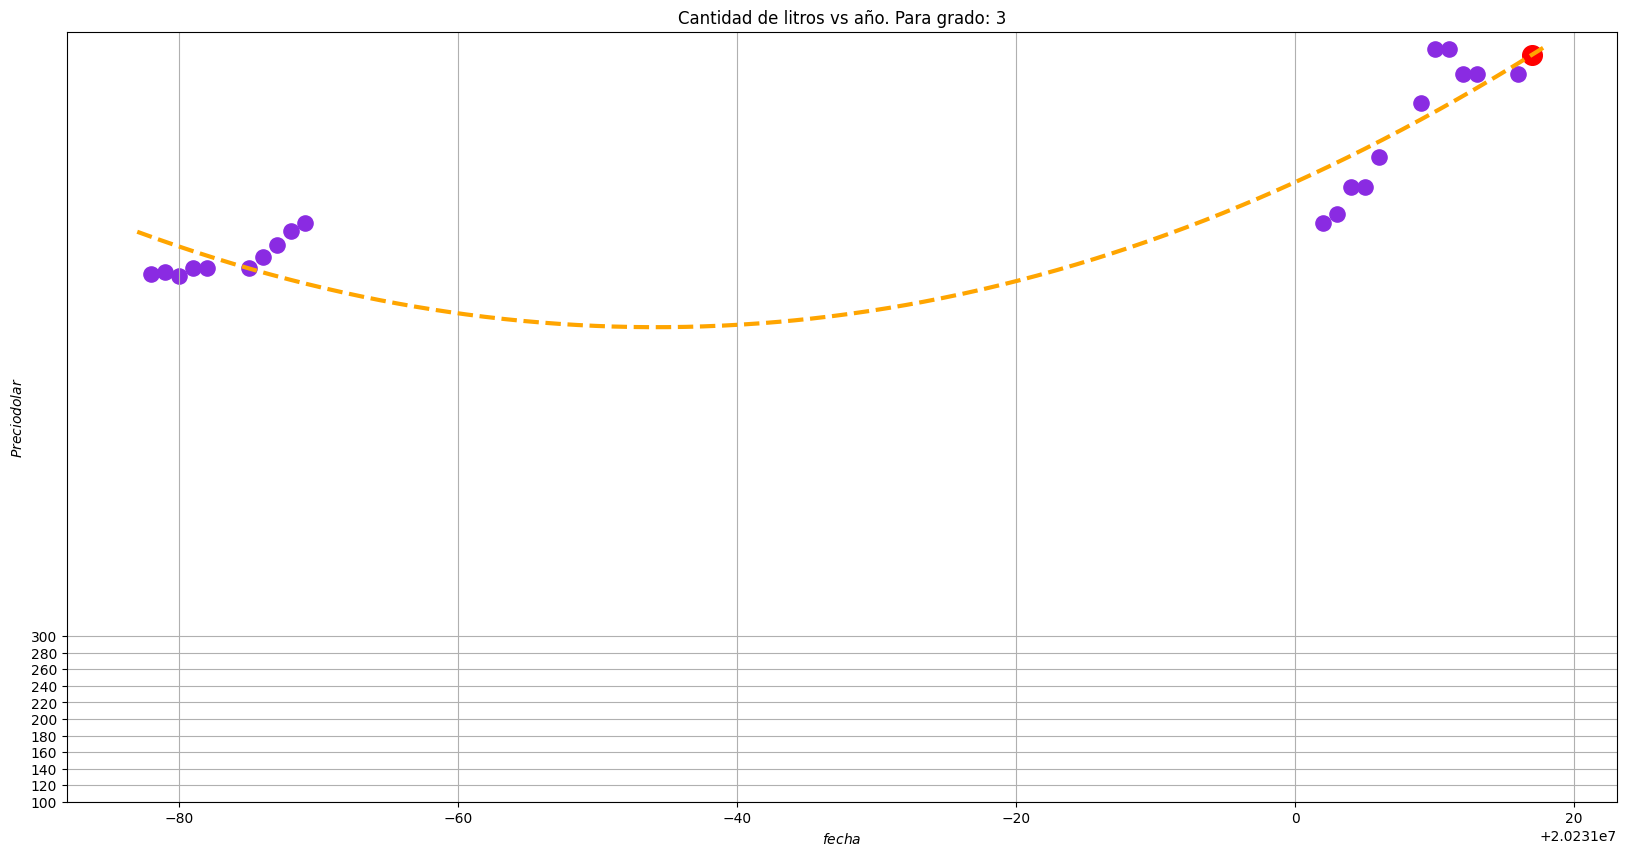

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 4 la predicción es 1003.25390625


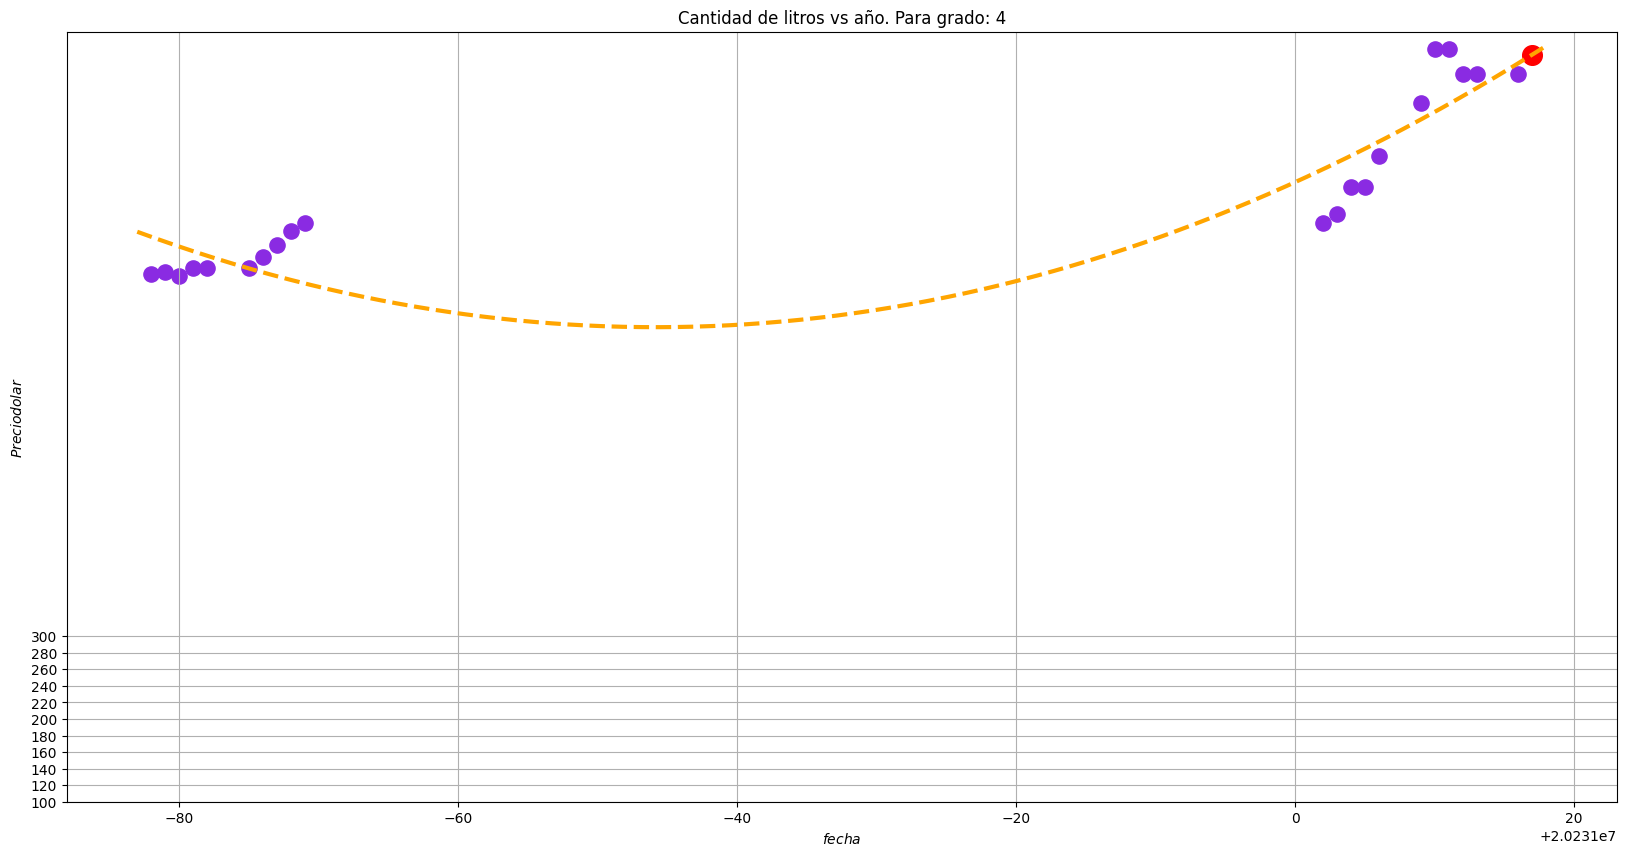

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 5 la predicción es 1003.2626953125


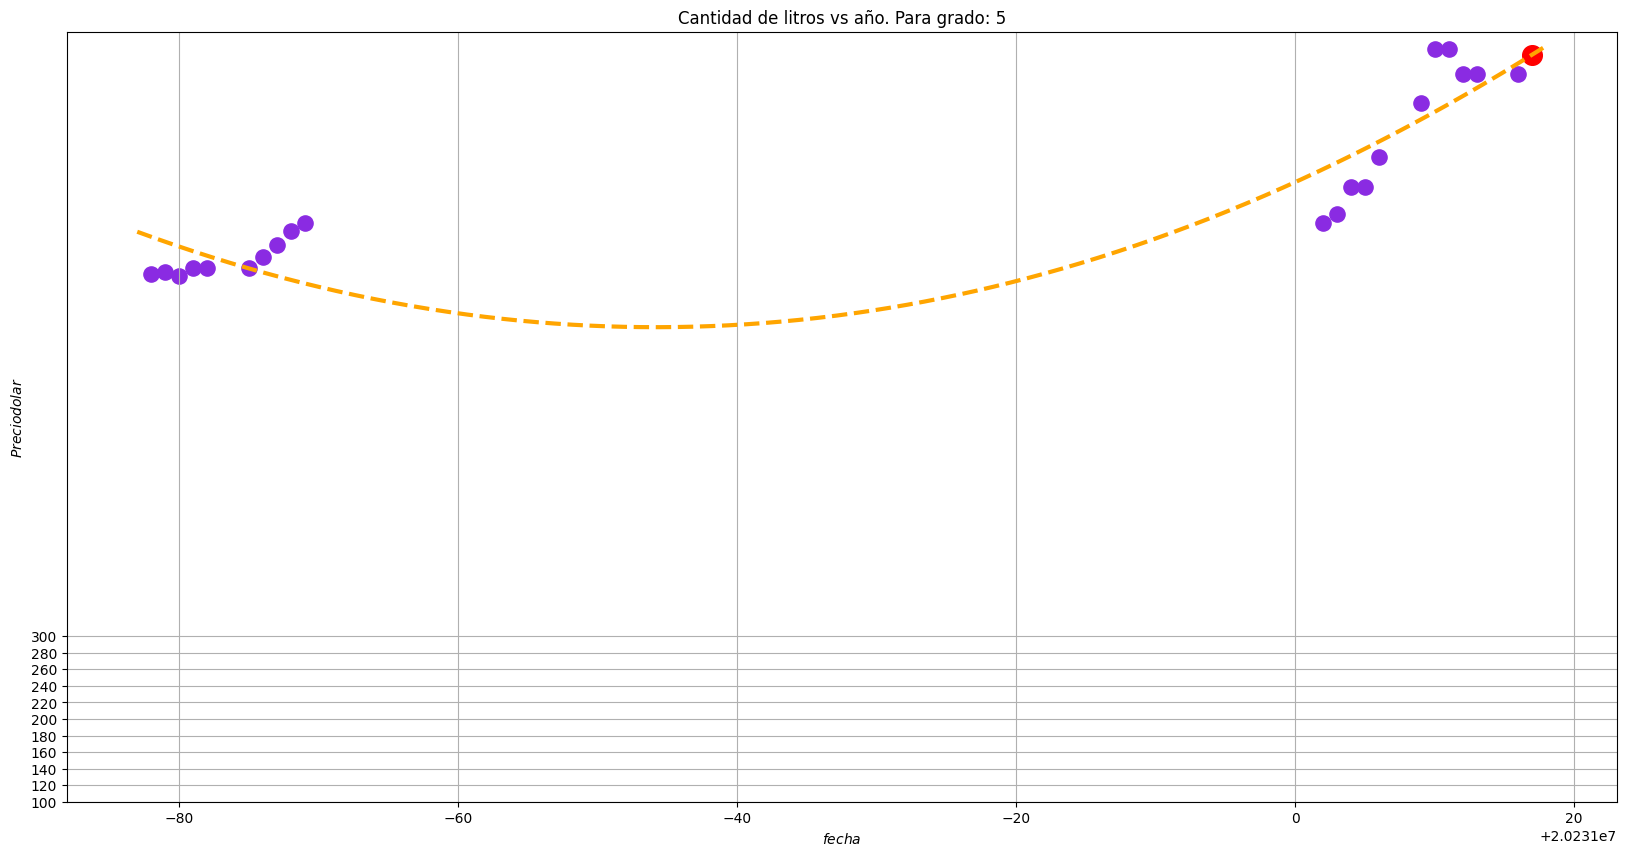

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 6 la predicción es 1003.255859375


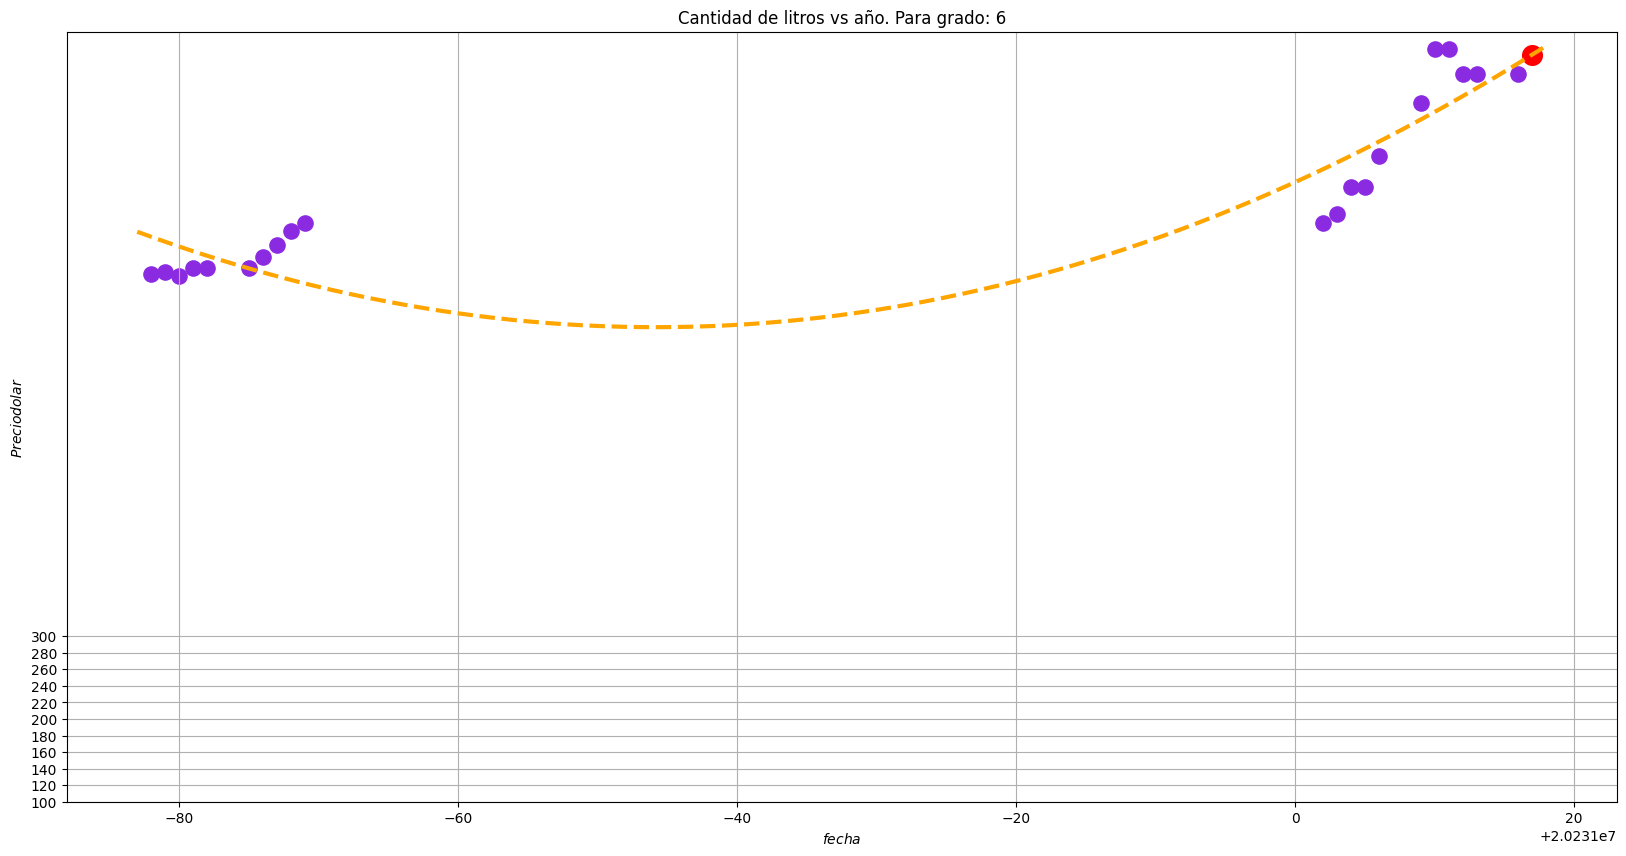

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 7 la predicción es 1003.25537109375


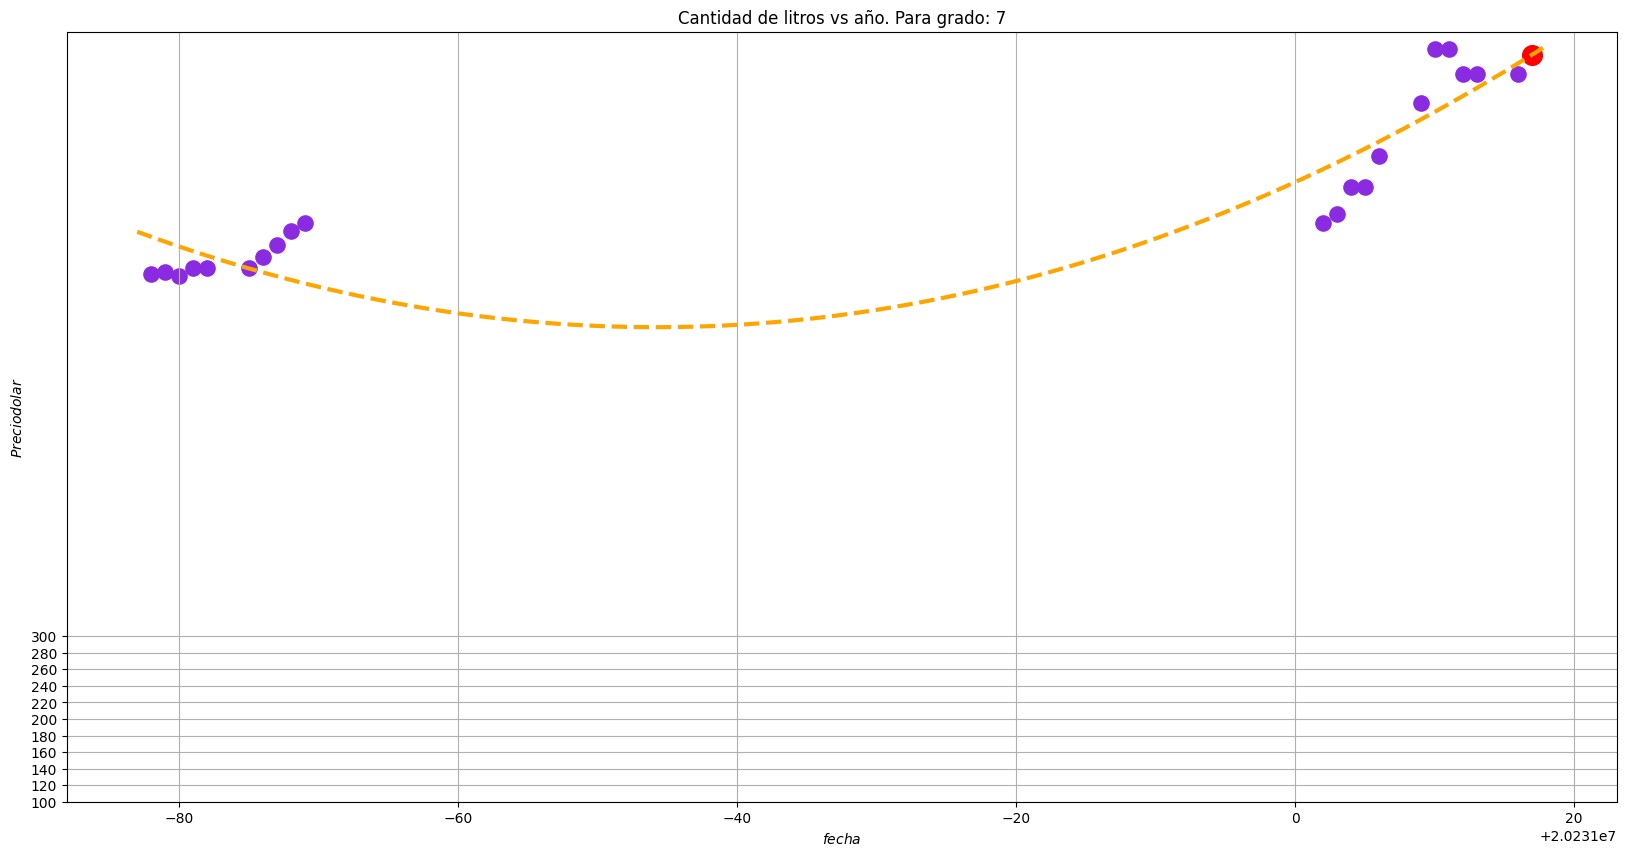

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 8 la predicción es 1003.25830078125


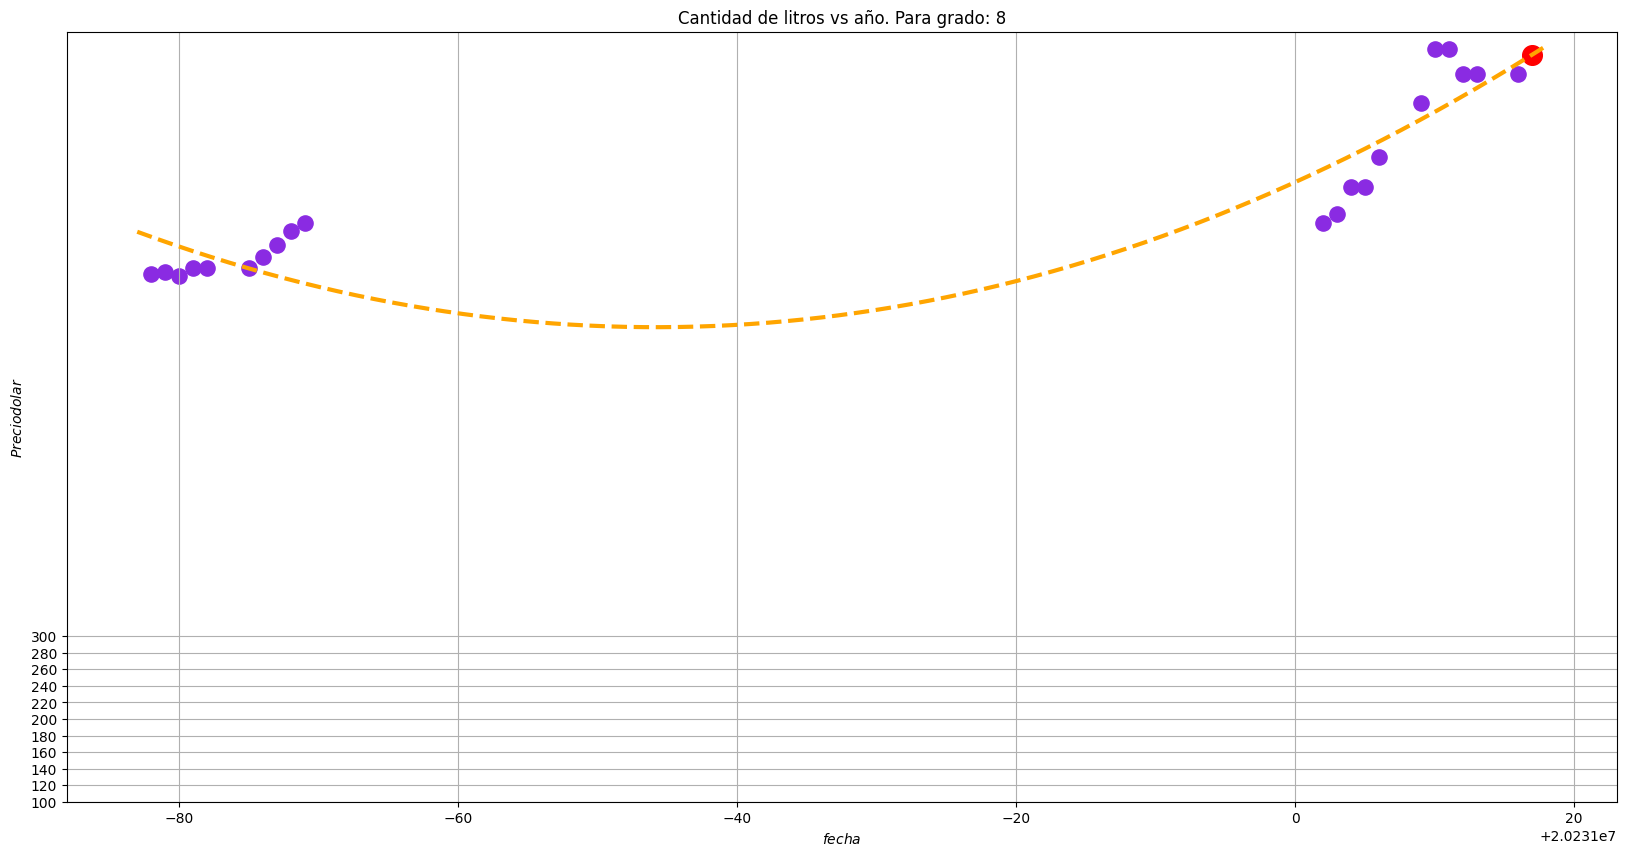

C:\Users\josem\AppData\Local\Temp\ipykernel_7732\2487194766.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


para grado 9 la predicción es 1003.257568359375


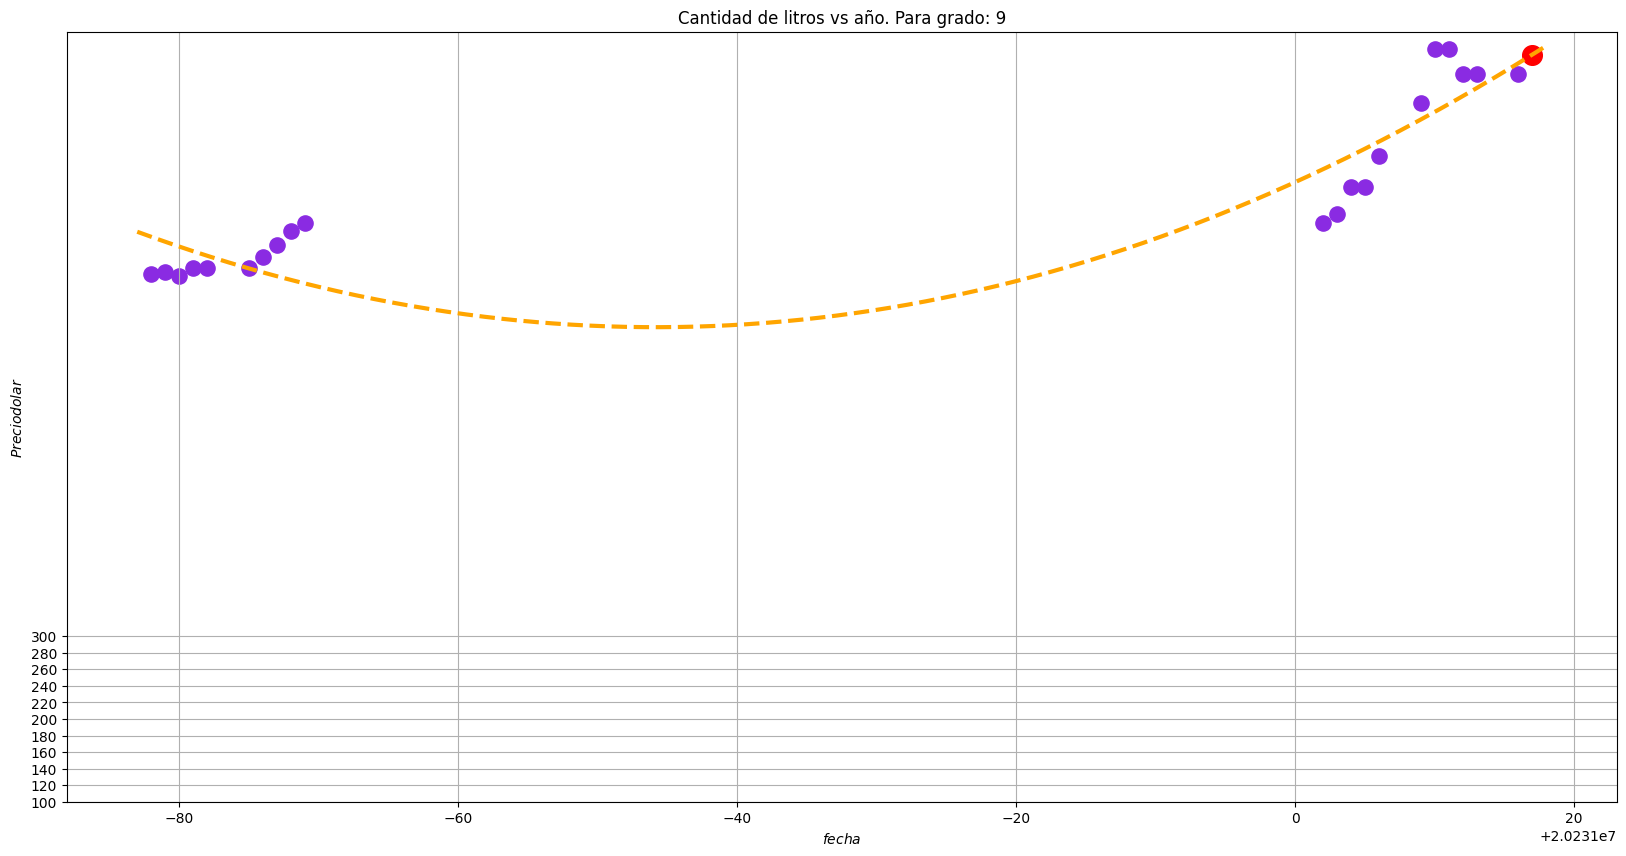

In [214]:
anno = 20231017
for i in range(0,10):
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef, anno)
    
    print(f"para grado {i} la predicción es {p}")
    x1 = np.linspace(20230917, anno + 1, 1000)
    y1 = fx(x1, coef) # funcion
    plt.figure(figsize=[20,10])
    plt.title("Cantidad de litros vs año. Para grado: " + str(i))
    
    plt.scatter(x,y,s=120,c='blueviolet')
    plt.plot(x1,y1,"--",linewidth=3,color='orange')
    plt.scatter(anno,p,s=200,c='red')
    plt.yticks(range(100,320,20))
    plt.grid("on")
    ax=plt.gca()
    ax.set_xlabel("$fecha$")
    ax.set_ylabel("$Precio dolar$")
    #plt.savefig("img" + str(i)+".jpg", dpi=600)
    plt.show()